In [ ]:
!pip install --upgrade librosa

ERROR: Operation cancelled by user


In [ ]:
import librosa
import librosa.display

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import Audio, display, Image, YouTubeVideo

In [ ]:
filename = '/content/drive/MyDrive/Haunting_song_of_humpback_whales-youtube-W5Trznre92c.wav'

In [ ]:
y, sr = librosa.load(filename)

whale_song, _ = librosa.effects.trim(y)
Audio(data=whale_song, rate=sr)

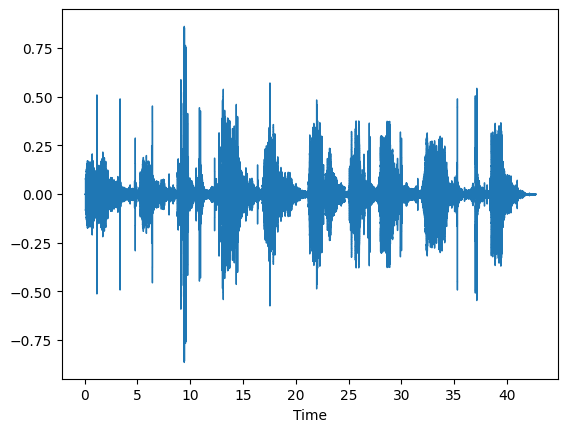

In [ ]:
librosa.display.waveshow(whale_song, sr=sr);
#Bu satır, temizlenmiş dalga formunu zaman ekseninde görselleştirir.

'kısa zamanlı Fourier dönüşümü (STFT) kullanılarak spektrogram hesaplanır ve görselleştirilir. \nn_fft parametresi, FFT boyutunu belirtir ve zaman bölgeleri spektral bölgelere dönüştürülür.\n Ardından, hesaplanan spektrogram verisi basit bir çizgi grafiğiyle gösterilir.'

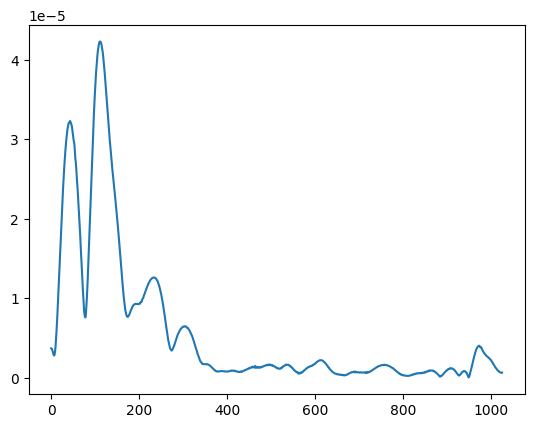

In [ ]:
n_fft = 2048
D = np.abs(librosa.stft(whale_song[:n_fft], n_fft=n_fft, hop_length=n_fft+1))
plt.plot(D);
'''kısa zamanlı Fourier dönüşümü (STFT) kullanılarak spektrogram hesaplanır ve görselleştirilir.
n_fft parametresi, FFT boyutunu belirtir ve zaman bölgeleri spektral bölgelere dönüştürülür.
 Ardından, hesaplanan spektrogram verisi basit bir çizgi grafiğiyle gösterilir.'''

'pek bir şey göremiyoruz. Bunun nedeni, insanların duyduğu seslerin çoğunun çok küçük frekans ve genlik aralıklarında yoğunlaşmasıdır.'

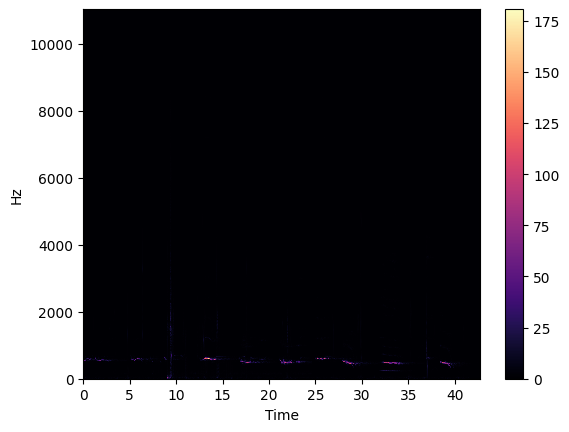

In [ ]:
hop_length = 512
D = np.abs(librosa.stft(whale_song, n_fft=n_fft,  hop_length=hop_length))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='linear');
plt.colorbar();
'''pek bir şey göremiyoruz. Bunun nedeni, insanların duyduğu seslerin çoğunun çok küçük frekans ve genlik aralıklarında yoğunlaşmasıdır.'''

"Küçük bir ayar daha yapalım - hem y eksenini (frekans) log ölçeğine, hem de “renk” eksenini (genlik) Desibel'e dönüştürelim , bu da bir tür genliklerin log ölçeğidir."

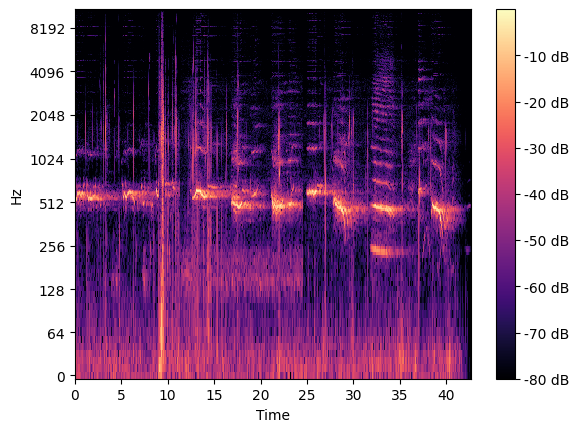

In [ ]:
DB = librosa.amplitude_to_db(D, ref=np.max)
librosa.display.specshow(DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');
'''Küçük bir ayar daha yapalım - hem y eksenini (frekans) log ölçeğine, hem de “renk” eksenini (genlik) Desibel'e dönüştürelim , bu da bir tür genliklerin log ölçeğidir.'''

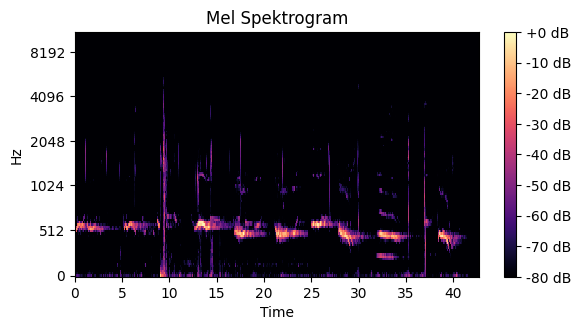

In [ ]:
# Mel spektrogramlara dönüşüm
n_mels = 128
mel_spec = librosa.feature.melspectrogram(y=whale_song, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
mel_db = librosa.amplitude_to_db(mel_spec, ref=np.max)

# Mel spektrogramun görselleştirilmesi
plt.figure(figsize=(6, 6))


plt.subplot(2, 1, 2)
librosa.display.specshow(mel_db, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spektrogram')

plt.tight_layout()
plt.show()
